In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras 
import tensorflow as tf

Load Data

---



---



In [ ]:
(X_train,y_train),(X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
#Print shape of data
print(X_train.shape,y_train.shape) 
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X_train[59999] # image data in 2d numpy array shape 28x28 pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[59999] 

5

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

Show Image/

---



---



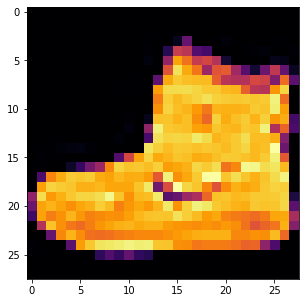

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='inferno')

In [ ]:
y_train[0]

9

In [ ]:
class_labels[y_train[0]]

'Ankle boot'

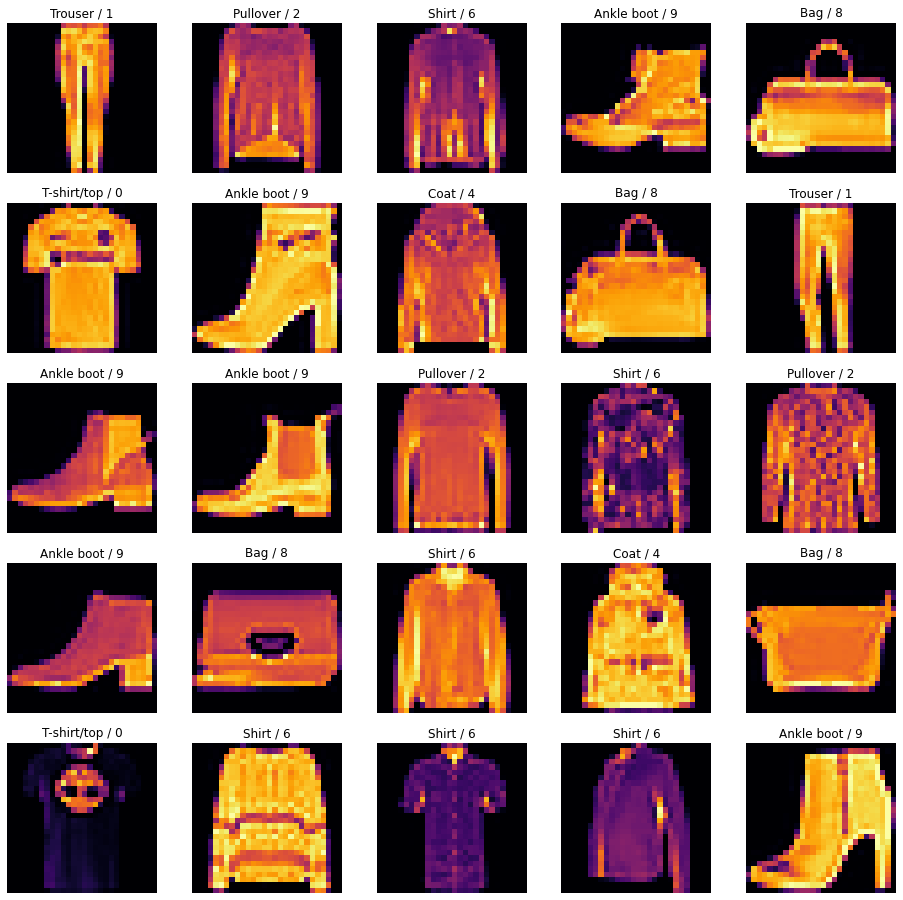

In [ ]:
plt.figure(figsize=(16,16))

j=1
for i in np.random.randint(0,60000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i], cmap="inferno")
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**Feature Scaling**

---



---



---



In [ ]:
X_train = X_train/255
X_test = X_test/255

Split Dataset

---



---


In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=42)

**Building** **CNN**

---



---






In [ ]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.utils import plot_model
import math
from keras.optimizers import RMSprop

**MOdel #1**

---



---



In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [26]:
model=tf.keras.Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2), padding='same', activation='relu', input_shape=[28,28,1]))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=10,activation='softmax'))



In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 32)          18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               1

In [28]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history=model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_validation, y_validation), callbacks=[callback])

Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5988 - accuracy: 0.7845 - val_loss: 0.4070 - val_accuracy: 0.8536
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3819 - accuracy: 0.8625 - val_loss: 0.3670 - val_accuracy: 0.8650
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3290 - accuracy: 0.8824 - val_loss: 0.3259 - val_accuracy: 0.8849
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3024 - accuracy: 0.8911 - val_loss: 0.2949 - val_accuracy: 0.8955
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2779 - accuracy: 0.8983 - val_loss: 0.3173 - val_accuracy: 0.8834
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2623 - accuracy: 0.9035 - val_loss: 0.2967 - val_accuracy: 0.8926
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2476 - accuracy: 0.9074 - val_loss: 0.2723 - val_accuracy:

In [30]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


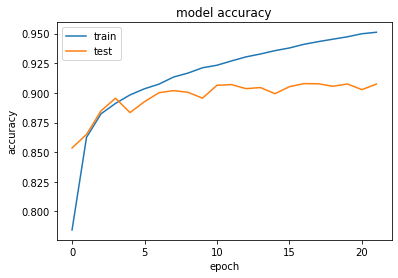

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

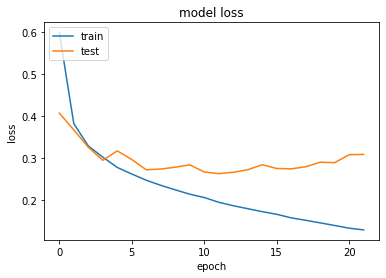

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model #2**

---



---



In [33]:
model2=tf.keras.Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3,3), padding='same', input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64,kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(units=128,activation='relu'))


model2.add(Dense(units=10,activation='softmax'))


In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [35]:
model2.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history2=model2.fit(X_train, y_train, epochs=50, batch_size=100, verbose=1, validation_data=(X_validation, y_validation),)

Epoch 1/50
480/480 [==============================] - 3s 4ms/step - loss: 0.4861 - accuracy: 0.8260 - val_loss: 0.3577 - val_accuracy: 0.8699
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 0.3221 - accuracy: 0.8859 - val_loss: 0.3001 - val_accuracy: 0.8904
Epoch 3/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2773 - accuracy: 0.9000 - val_loss: 0.2709 - val_accuracy: 0.9046
Epoch 4/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2485 - accuracy: 0.9098 - val_loss: 0.2658 - val_accuracy: 0.9061
Epoch 5/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2233 - accuracy: 0.9179 - val_loss: 0.2542 - val_accuracy: 0.9059
Epoch 6/50
480/480 [==============================] - 2s 4ms/step - loss: 0.2048 - accuracy: 0.9250 - val_loss: 0.2486 - val_accuracy: 0.9113
Epoch 7/50
480/480 [==============================] - 2s 4ms/step - loss: 0.1858 - accuracy: 0.9318 - val_loss: 0.2396 - val_accuracy: 0.9157
Epoch 

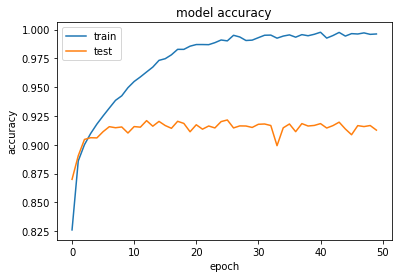

In [37]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

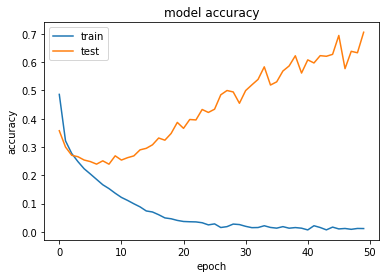

In [38]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
#pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 4.7 MB/s 


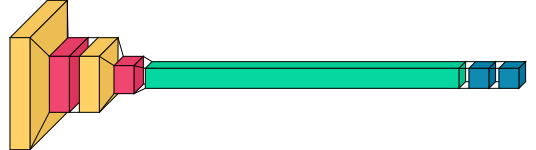

In [41]:
import visualkeras
visualkeras.layered_view(model2)

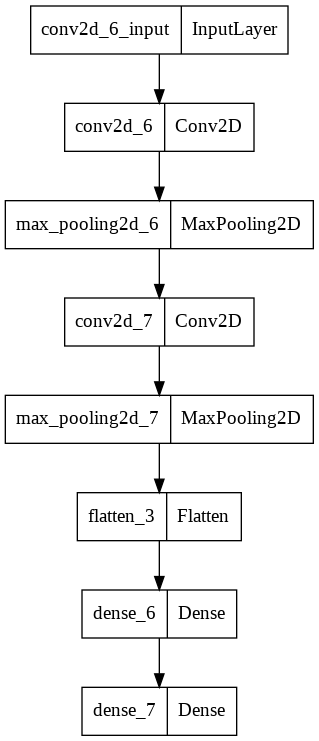

In [42]:
from keras.utils import plot_model
plot_model(model2, to_file='model2.png')

**Model #3**

---



---



In [45]:
model3 = tf.keras.Sequential()

model3.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model3.add(MaxPool2D(pool_size=(2, 2)))


model3.add(Conv2D(64, 3, padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Dropout(0.3))
model3.add(BatchNormalization())
model3.add(Conv2D(128, 3, padding='same', activation='relu'))
model3.add(Conv2D(128, 3, padding='same', activation='relu'))
model3.add(MaxPool2D(pool_size=(2, 2)))

model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(BatchNormalization())
model3.add(Dense(512, activation='relu'))

model3.add(Dropout(0.25))
model3.add(Dense(10, activation='softmax'))

In [46]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)        

In [48]:
model3.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history3=model3.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1, validation_data=(X_validation, y_validation),)

Epoch 1/100
375/375 [==============================] - 4s 8ms/step - loss: 0.3486 - accuracy: 0.8689 - val_loss: 0.2974 - val_accuracy: 0.8907
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.3139 - accuracy: 0.8832 - val_loss: 0.2740 - val_accuracy: 0.8992
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2971 - accuracy: 0.8886 - val_loss: 0.2603 - val_accuracy: 0.9042
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2798 - accuracy: 0.8960 - val_loss: 0.2483 - val_accuracy: 0.9104
Epoch 5/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2687 - accuracy: 0.9001 - val_loss: 0.2495 - val_accuracy: 0.9076
Epoch 6/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2550 - accuracy: 0.9055 - val_loss: 0.2441 - val_accuracy: 0.9122
Epoch 7/100
375/375 [==============================] - 3s 9ms/step - loss: 0.2479 - accuracy: 0.9076 - val_loss: 0.2424 - val_accuracy: 0.9106

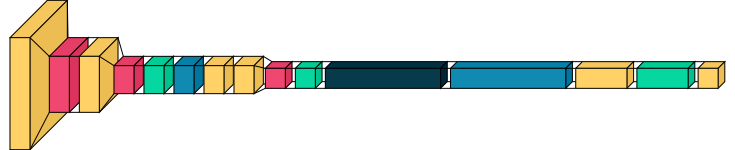

In [51]:
visualkeras.layered_view(model3)

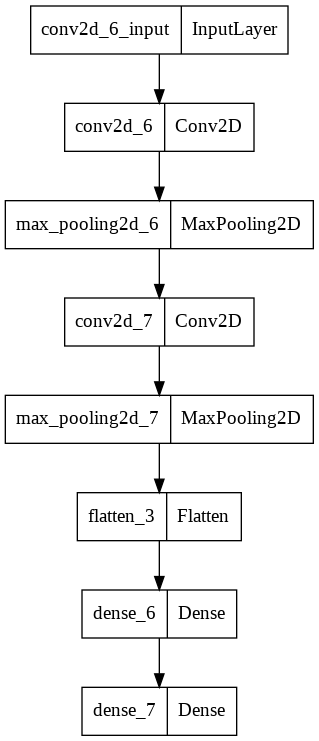

In [52]:
plot_model(model2, to_file='model3.png')

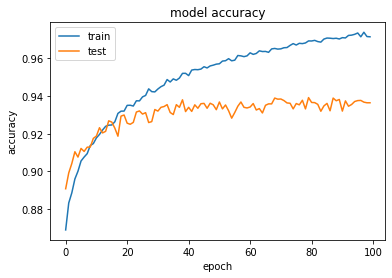

In [62]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

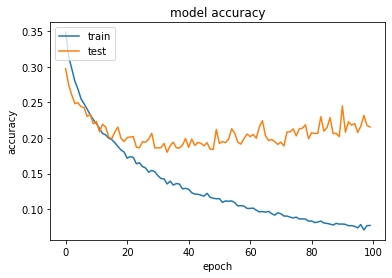

In [63]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Evaluate the model

In [53]:
score = model3.evaluate(X_test, y_test, )
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9315
Test loss: 0.25613027811050415
Test accuracy: 0.9315000176429749


In [54]:
y_pred = model3.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

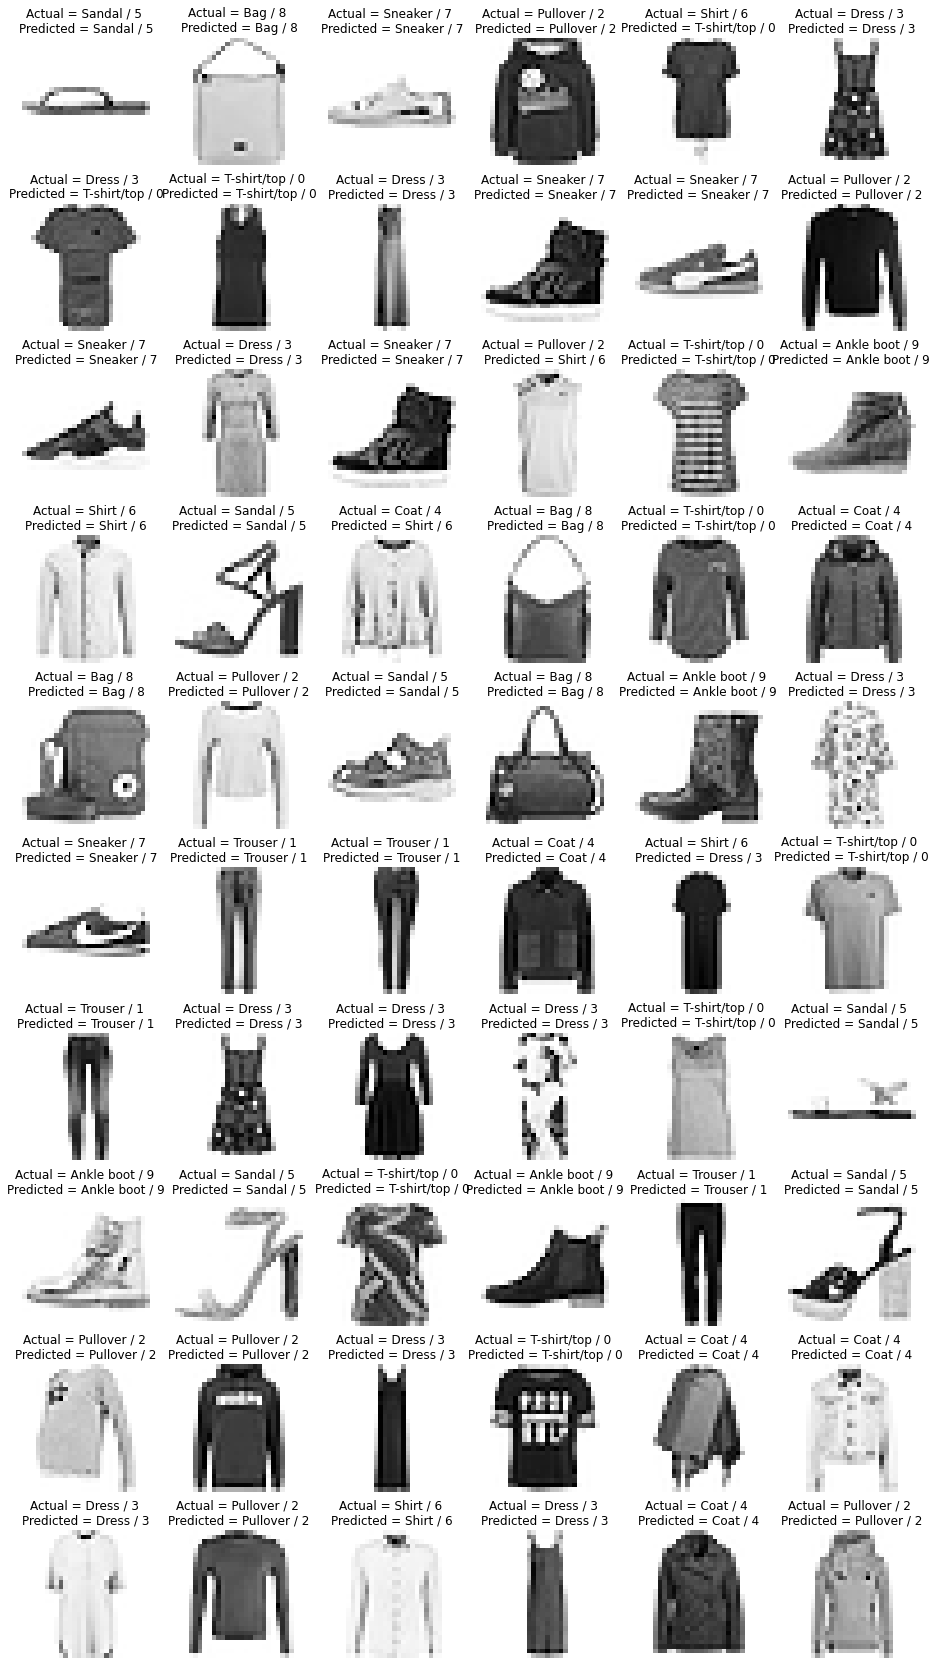

In [55]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]], y_test[i], class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

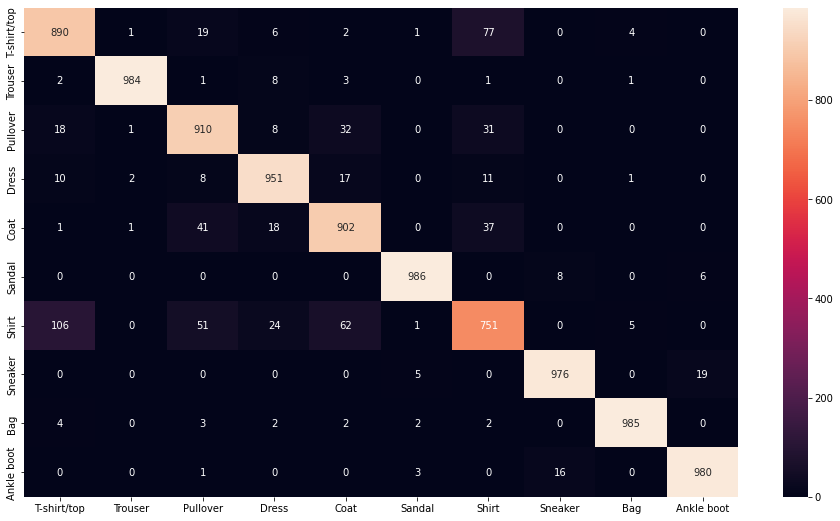

In [56]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

# show cm 
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_labels, yticklabels=class_labels)

In [57]:
from sklearn.metrics import classification_report
cr= classification_report(y_test, y_pred_labels, target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.91      0.89      1000
       Dress       0.94      0.95      0.94      1000
        Coat       0.88      0.90      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.83      0.75      0.79      1000
     Sneaker       0.98      0.98      0.98      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.98      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



**Saving Model**

---



---



In [58]:
#Save Model

model3.save('model3.h5')

In [59]:
Y_pred_sample = model3.predict(np.expand_dims(X_test[0], axis=0)).round(2)
Y_pred_sample

1/1 [==============================] - 0s 104ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [60]:
np.argmax(Y_pred_sample[0])

9

In [61]:
y_test[0]

9

Tuning

---



---



---



In [64]:
##test

model4 = tf.keras.Sequential()

model4.add(Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(BatchNormalization())


model4.add(Conv2D(64, 3, padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))
model4.add(BatchNormalization())


model4.add(Conv2D(128, 3, padding='same', activation='relu'))
model4.add(BatchNormalization())


model4.add(Conv2D(128, 3, padding='same', activation='relu'))
model4.add(MaxPool2D(pool_size=(2, 2)))
model4.add(Dropout(0.4))

model4.add(Flatten())
model4.add(BatchNormalization())

model4.add(Dense(512, activation='relu'))

model4.add(Dropout(0.25))
model4.add(Dense(10, activation='softmax'))

In [65]:
model4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
history4=model4.fit(X_train, y_train, epochs=100, batch_size=128, verbose=1, validation_data=(X_validation, y_validation),)

Epoch 1/100
375/375 [==============================] - 5s 10ms/step - loss: 0.5624 - accuracy: 0.7986 - val_loss: 0.3823 - val_accuracy: 0.8612
Epoch 2/100
375/375 [==============================] - 3s 8ms/step - loss: 0.3600 - accuracy: 0.8686 - val_loss: 0.2785 - val_accuracy: 0.9003
Epoch 3/100
375/375 [==============================] - 3s 8ms/step - loss: 0.3075 - accuracy: 0.8856 - val_loss: 0.2516 - val_accuracy: 0.9036
Epoch 4/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2704 - accuracy: 0.8998 - val_loss: 0.2349 - val_accuracy: 0.9119
Epoch 5/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2539 - accuracy: 0.9048 - val_loss: 0.2498 - val_accuracy: 0.9081
Epoch 6/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2384 - accuracy: 0.9113 - val_loss: 0.2159 - val_accuracy: 0.9202
Epoch 7/100
375/375 [==============================] - 3s 8ms/step - loss: 0.2298 - accuracy: 0.9139 - val_loss: 0.2339 - val_accuracy: 0.912

In [67]:
score = model4.evaluate(X_test, y_test, )
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.3023 - accuracy: 0.9347
Test loss: 0.30230557918548584
Test accuracy: 0.9347000122070312


**Slight improvement over model3**:)

---

